<a href="https://colab.research.google.com/github/nchebet09/Restaurant-Recommender-System/blob/master/Akeed_6_Cluster_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import plotly.express as px

In [ ]:
clean = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/clean_train.csv')
clean.head()

In [ ]:
clean.shape

In [ ]:
clean.reset_index(drop=True)
clean.head()

## Implement Downsampling

In [ ]:
# implement downsampling on no_order class
no_order = clean[clean.target == 0]
no_order = no_order.sample(frac=0.06)

In [ ]:
# create train set
train = pd.concat([clean[clean.target == 1], no_order], ignore_index=True) # concat sample no_orders and orders
train.shape

In [ ]:
# check target class distribution
train.target.value_counts()

In [ ]:
# export sampled train set for clustering
train.to_csv('/content/drive/My Drive/Akeed Recommendation Files/sampled_train.csv', index =False)

In [ ]:
# load the data sets
train = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/sampled_train.csv')
train.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,u_diff
0,TCHWPBT,0,1,1,0,-96.4400,-67.20,237,118838.0,-0.94340,0.0817,Restaurants,2.0,0.7,15.0,0.0,15,0.0,0.0,0,11,4.6,0,"1,5,8,57,30,27,24,16",3,TCHWPBT X 0 X 237,1,5,10179.280752,789
1,TCHWPBT,0,1,1,2,-0.1287,-78.56,113,118710.0,0.63040,0.5270,Restaurants,2.0,0.0,15.0,1.0,10,0.0,1.0,1,11,4.7,462,"2,8,91,10",3,TCHWPBT X 2 X 113,1,12,8794.323110,790
2,ZGFSYCZ,0,1,1,0,-0.1755,-78.56,274,118875.0,0.30540,0.5600,Sweets & Bakes,3.0,0.7,15.0,0.0,45,0.0,0.0,0,11,3.7,180,"41,57",3,ZGFSYCZ X 0 X 274,1,12,8797.883809,787
3,ZGFSYCZ,0,1,1,0,-0.1755,-78.56,303,118905.0,0.00575,0.4822,Restaurants,2.0,0.7,15.0,1.0,15,0.0,1.0,1,11,4.7,1088,"60,38,61,16,36",3,ZGFSYCZ X 0 X 303,1,7,8789.111559,781
4,ZGFSYCZ,0,1,1,1,0.1912,-78.60,28,118624.0,0.48070,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,3,ZGFSYCZ X 1 X 28,1,12,8801.258975,786


In [ ]:
# load test data
test = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/clean_test.csv')
test.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff
0,ICE2DJP,0,1,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",3,ICE2DJP X 0 X 4,12,10210.781498,789
1,ICE2DJP,0,1,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",3,ICE2DJP X 0 X 13,14,10223.800918,788
2,ICE2DJP,0,1,1,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",3,ICE2DJP X 0 X 20,14,10232.068678,789
3,ICE2DJP,0,1,1,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",3,ICE2DJP X 0 X 23,12,10211.117900,784
4,ICE2DJP,0,1,1,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,3,ICE2DJP X 0 X 28,12,10331.347778,787


In [ ]:
train.shape, test.shape

((421662, 30), (1631700, 29))

In [ ]:
# drop c_diff and target columns in train
y = train['target']
train.drop('target', 1, inplace=True)

In [ ]:
train.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff
0,TCHWPBT,0,1,1,0,-96.4400,-67.20,237,118838.0,-0.94340,0.0817,Restaurants,2.0,0.7,15.0,0.0,15,0.0,0.0,0,11,4.6,0,"1,5,8,57,30,27,24,16",3,TCHWPBT X 0 X 237,5,10179.280752,789
1,TCHWPBT,0,1,1,2,-0.1287,-78.56,113,118710.0,0.63040,0.5270,Restaurants,2.0,0.0,15.0,1.0,10,0.0,1.0,1,11,4.7,462,"2,8,91,10",3,TCHWPBT X 2 X 113,12,8794.323110,790
2,ZGFSYCZ,0,1,1,0,-0.1755,-78.56,274,118875.0,0.30540,0.5600,Sweets & Bakes,3.0,0.7,15.0,0.0,45,0.0,0.0,0,11,3.7,180,"41,57",3,ZGFSYCZ X 0 X 274,12,8797.883809,787
3,ZGFSYCZ,0,1,1,0,-0.1755,-78.56,303,118905.0,0.00575,0.4822,Restaurants,2.0,0.7,15.0,1.0,15,0.0,1.0,1,11,4.7,1088,"60,38,61,16,36",3,ZGFSYCZ X 0 X 303,7,8789.111559,781
4,ZGFSYCZ,0,1,1,1,0.1912,-78.60,28,118624.0,0.48070,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,3,ZGFSYCZ X 1 X 28,12,8801.258975,786


In [ ]:
# concat train and test dataframes
combined = pd.concat([train, test])
combined.shape

(2053362, 29)

In [ ]:
# assign features
X = combined.drop(['akeed_customer_id', 'vendor_category_en', 'vendor_tag', 'CID X LOC_NUM X VENDOR'], 1,)
X.head(2)

,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,device_type,duration,haversine_dist,u_diff
0,0,1,1,0,-96.4400,-67.20,237,118838.0,-0.9434,0.0817,2.0,0.7,15.0,0.0,15,0.0,0.0,0,11,4.6,0,3,5,10179.280752,789
1,0,1,1,2,-0.1287,-78.56,113,118710.0,0.6304,0.5270,2.0,0.0,15.0,1.0,10,0.0,1.0,1,11,4.7,462,3,12,8794.323110,790


## Implement K-means Clustering

In [ ]:
# scale the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

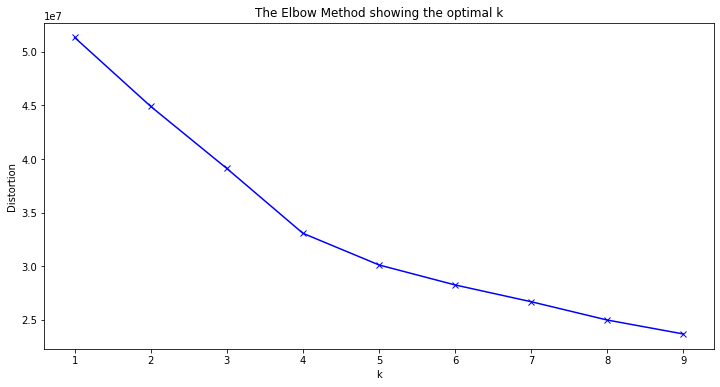

In [ ]:
# find the optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# implement k-means clustering
kmeans = kmeans = KMeans(n_clusters=4, algorithm = 'auto')
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Normalized k-means

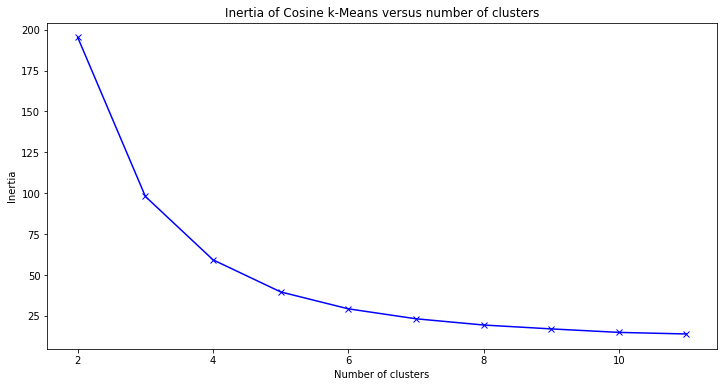

In [ ]:
# find the optimal number of clusters
normalized_vectors = normalize(X)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_ for i in range(10)]

plt.figure(figsize=(12,6))
K = range(2,12)
plt.plot(K, scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.show()

In [ ]:
normalized_kmeans = KMeans(n_clusters=5)
normalized_kmeans.fit(normalized_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# compare clusters using silhouette_score
# print('kmeans: {}'.format(silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')))
print('Cosine kmeans: {}'.format(silhouette_score(normalized_vectors, normalized_kmeans.labels_, metric='cosine')))

## Evaluating the clusters

In [ ]:
# scale the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X))
df_scaled.columns = X.columns
df_scaled['normalized_kmeans'] = normalized_kmeans.labels_
df_scaled.head()

,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,device_type,duration,haversine_dist,u_diff,normalized_kmeans
0,0.0,1.0,1.0,0.000000,0.631157,0.373873,0.258029,0.016787,0.004076,0.033517,0.0,1.0,1.0,0.0,0.250,0.0,0.0,0.0,1.0,0.8750,0.000000,1.0,0.692308,0.554366,0.998795,1
1,0.0,1.0,1.0,0.068966,0.695717,0.310671,0.120709,0.007871,0.011679,0.043268,0.0,0.0,1.0,1.0,0.125,0.0,1.0,1.0,1.0,0.9375,0.192821,1.0,0.871795,0.478941,1.000000,1
2,0.0,1.0,1.0,0.000000,0.695686,0.310671,0.299003,0.019365,0.010109,0.043990,1.0,1.0,1.0,0.0,1.000,0.0,0.0,0.0,1.0,0.3125,0.075125,1.0,0.871795,0.479135,0.996386,1
3,0.0,1.0,1.0,0.000000,0.695686,0.310671,0.331118,0.021454,0.008661,0.042287,0.0,1.0,1.0,1.0,0.250,0.0,1.0,1.0,1.0,0.9375,0.454090,1.0,0.743590,0.478657,0.989157,1
4,0.0,1.0,1.0,0.034483,0.695932,0.310448,0.026578,0.001881,0.010956,0.043831,0.0,1.0,1.0,1.0,0.125,0.0,1.0,1.0,1.0,0.7500,0.013356,1.0,0.871795,0.479319,0.995181,1


In [ ]:
# Calculate variables with largest differences (by standard deviation)
df_mean = df_scaled.loc[df_scaled.normalized_kmeans!=-1, :].groupby('normalized_kmeans').mean().reset_index(drop=True)
results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(7).Variable.values) + ['normalized_kmeans']

Due to the high number of variables, we wil visualize only those that have the greatest impact on a cluster.

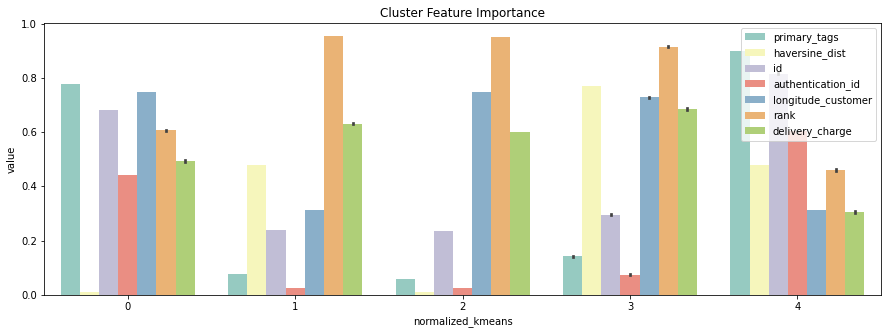

In [ ]:
# Plot data
tidy = df_scaled[selected_columns].melt(id_vars='normalized_kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='normalized_kmeans', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(loc='upper right')
plt.title('Cluster Feature Importance')
plt.show()

### Note:
The higher the standard deviation in a variable based on average values for each cluster. The more likely that the variable is important when creating the cluster

In [ ]:
combined['normalized_kmeans'] = normalized_kmeans.labels_
combined.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff,normalized_kmeans
0,TCHWPBT,0,1,1,0,-96.4400,-67.20,237,118838.0,-0.94340,0.0817,Restaurants,2.0,0.7,15.0,0.0,15,0.0,0.0,0,11,4.6,0,"1,5,8,57,30,27,24,16",3,TCHWPBT X 0 X 237,5,10179.280752,789,1
1,TCHWPBT,0,1,1,2,-0.1287,-78.56,113,118710.0,0.63040,0.5270,Restaurants,2.0,0.0,15.0,1.0,10,0.0,1.0,1,11,4.7,462,"2,8,91,10",3,TCHWPBT X 2 X 113,12,8794.323110,790,1
2,ZGFSYCZ,0,1,1,0,-0.1755,-78.56,274,118875.0,0.30540,0.5600,Sweets & Bakes,3.0,0.7,15.0,0.0,45,0.0,0.0,0,11,3.7,180,"41,57",3,ZGFSYCZ X 0 X 274,12,8797.883809,787,1
3,ZGFSYCZ,0,1,1,0,-0.1755,-78.56,303,118905.0,0.00575,0.4822,Restaurants,2.0,0.7,15.0,1.0,15,0.0,1.0,1,11,4.7,1088,"60,38,61,16,36",3,ZGFSYCZ X 0 X 303,7,8789.111559,781,1
4,ZGFSYCZ,0,1,1,1,0.1912,-78.60,28,118624.0,0.48070,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,3,ZGFSYCZ X 1 X 28,12,8801.258975,786,1


In [ ]:
# restore combined to train and test
end = 421662

train = combined.iloc[:end, :]
test = combined.iloc[end:, :]
train.shape, test.shape

((421662, 30), (1631700, 30))

In [ ]:
# restore target to train set
train = train.assign(target= y)
train.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,duration,haversine_dist,u_diff,normalized_kmeans,target
0,TCHWPBT,0.0,1.0,1.0,0.0,-96.4400,-67.20,237.0,118838.0,-0.94340,0.0817,Restaurants,2.0,0.7,15.0,0.0,15.0,0.0,0.0,0.0,11.0,4.6,0.0,"1,5,8,57,30,27,24,16",3.0,TCHWPBT X 0 X 237,5.0,10179.280752,789.0,1.0,1.0
1,TCHWPBT,0.0,1.0,1.0,2.0,-0.1287,-78.56,113.0,118710.0,0.63040,0.5270,Restaurants,2.0,0.0,15.0,1.0,10.0,0.0,1.0,1.0,11.0,4.7,462.0,"2,8,91,10",3.0,TCHWPBT X 2 X 113,12.0,8794.323110,790.0,1.0,1.0
2,ZGFSYCZ,0.0,1.0,1.0,0.0,-0.1755,-78.56,274.0,118875.0,0.30540,0.5600,Sweets & Bakes,3.0,0.7,15.0,0.0,45.0,0.0,0.0,0.0,11.0,3.7,180.0,"41,57",3.0,ZGFSYCZ X 0 X 274,12.0,8797.883809,787.0,1.0,1.0
3,ZGFSYCZ,0.0,1.0,1.0,0.0,-0.1755,-78.56,303.0,118905.0,0.00575,0.4822,Restaurants,2.0,0.7,15.0,1.0,15.0,0.0,1.0,1.0,11.0,4.7,1088.0,"60,38,61,16,36",3.0,ZGFSYCZ X 0 X 303,7.0,8789.111559,781.0,1.0,1.0
4,ZGFSYCZ,0.0,1.0,1.0,1.0,0.1912,-78.60,28.0,118624.0,0.48070,0.5527,Restaurants,2.0,0.7,15.0,1.0,10.0,0.0,1.0,1.0,11.0,4.4,32.0,5,3.0,ZGFSYCZ X 1 X 28,12.0,8801.258975,786.0,1.0,1.0


In [ ]:
# export train data set with clusters
train.to_csv('/content/drive/My Drive/Akeed Recommendation Files/clustered_train.csv', index =False)

In [ ]:
# export test data set with clusters
test.to_csv('/content/drive/My Drive/Akeed Recommendation Files/clustered_test.csv', index =False)